In [43]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [44]:
dataset = pd.read_csv('US-Pumpkins.csv')

In [45]:
dataset.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,4/29/2017,270,280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN
1,PUMPKINS,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,5/6/2017,270,280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN
2,PUMPKINS,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/2016,160,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/2016,160,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/2016,90,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [46]:
dataset.columns

Index(['Commodity Name', 'City Name', 'Type', 'Package', 'Variety',
       'Sub Variety', 'Grade', 'Date', 'Low Price', 'High Price', 'Mostly Low',
       'Mostly High', 'Origin', 'Origin District', 'Item Size', 'Color',
       'Environment', 'Unit of Sale', 'Quality', 'Condition', 'Appearance',
       'Storage', 'Crop', 'Repack', 'Trans Mode'],
      dtype='object')

In [47]:
dataset.isnull().sum()

Commodity Name       0
City Name            0
Type               153
Package              0
Variety              0
Sub Variety        128
Grade              153
Date                 0
Low Price            0
High Price           0
Mostly Low           0
Mostly High          0
Origin               5
Origin District    153
Item Size           25
Color              122
Environment        153
Unit of Sale       129
Quality            153
Condition          153
Appearance         153
Storage            153
Crop               153
Repack               0
Trans Mode         153
dtype: int64

In [48]:
data_filled = dataset.bfill()

In [49]:
data_filled.isnull().sum()

Commodity Name       0
City Name            0
Type               153
Package              0
Variety              0
Sub Variety          0
Grade              153
Date                 0
Low Price            0
High Price           0
Mostly Low           0
Mostly High          0
Origin               0
Origin District    153
Item Size            0
Color                3
Environment        153
Unit of Sale        33
Quality            153
Condition          153
Appearance         153
Storage            153
Crop               153
Repack               0
Trans Mode         153
dtype: int64

In [50]:
dataset['Color'] = dataset['Color'].fillna('ORANGE')

In [51]:
# Checking for NaN values after filling
data_filled.isnull().sum()

Commodity Name       0
City Name            0
Type               153
Package              0
Variety              0
Sub Variety          0
Grade              153
Date                 0
Low Price            0
High Price           0
Mostly Low           0
Mostly High          0
Origin               0
Origin District    153
Item Size            0
Color                3
Environment        153
Unit of Sale        33
Quality            153
Condition          153
Appearance         153
Storage            153
Crop               153
Repack               0
Trans Mode         153
dtype: int64

In [52]:
dataset.describe

<bound method NDFrame.describe of     Commodity Name  City Name  Type             Package      Variety  \
0         PUMPKINS  BALTIMORE   NaN        24 inch bins  HOWDEN TYPE   
1         PUMPKINS  BALTIMORE   NaN        24 inch bins  HOWDEN TYPE   
2         PUMPKINS  BALTIMORE   NaN        24 inch bins  HOWDEN TYPE   
3         PUMPKINS  BALTIMORE   NaN        24 inch bins  HOWDEN TYPE   
4         PUMPKINS  BALTIMORE   NaN        24 inch bins  HOWDEN TYPE   
..             ...        ...   ...                 ...          ...   
148       PUMPKINS  BALTIMORE   NaN  1/2 bushel cartons    MINIATURE   
149       PUMPKINS  BALTIMORE   NaN  1/2 bushel cartons    MINIATURE   
150       PUMPKINS  BALTIMORE   NaN  1/2 bushel cartons    MINIATURE   
151       PUMPKINS  BALTIMORE   NaN  1/2 bushel cartons    MINIATURE   
152       PUMPKINS  BALTIMORE   NaN  1/2 bushel cartons    MINIATURE   

    Sub Variety  Grade       Date  Low Price  High Price  ...   Color  \
0           NaN    NaN  4/29

In [53]:
# Separate independent variables (features) and dependent variable (target)
X = dataset[['Origin','Item Size','Variety','City Name','Package']]  # Independent variables
y = dataset['Color']         # Dependent variable

In [54]:
# One-hot encode the categorical variables
X = pd.get_dummies(X, columns=['Origin', 'Item Size', 'Variety', 'City Name', 'Package'], drop_first=True)
y = pd.get_dummies(y, columns=['Color'], drop_first=True)


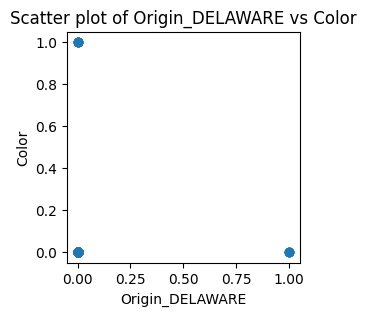

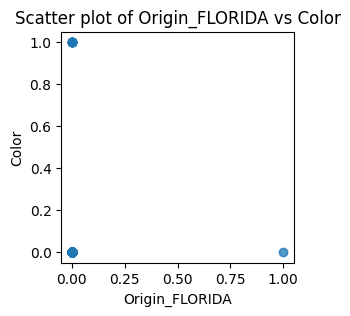

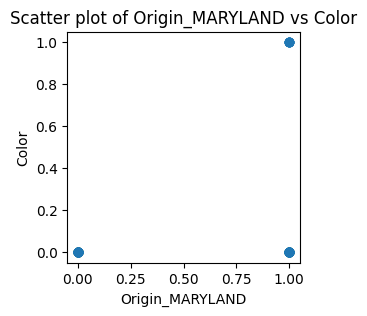

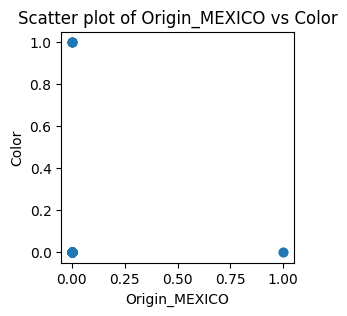

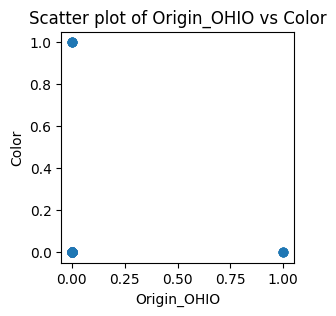

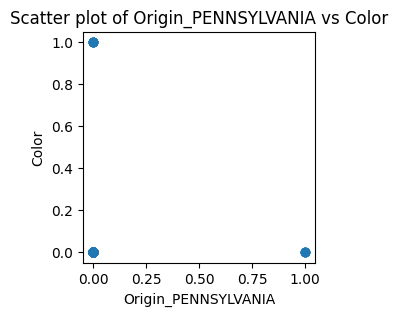

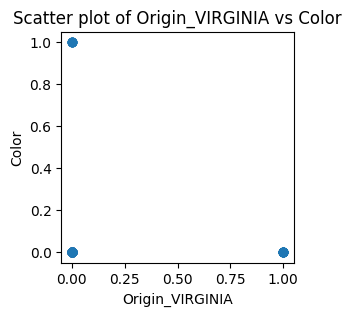

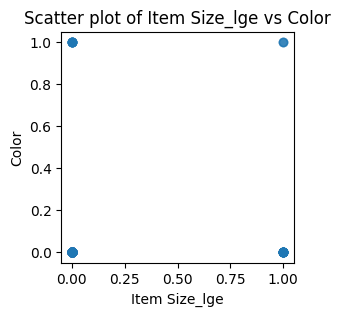

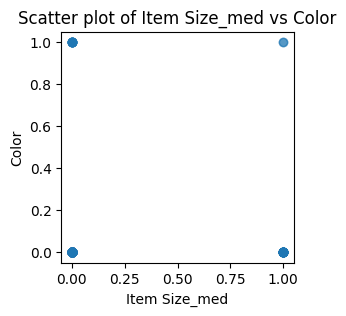

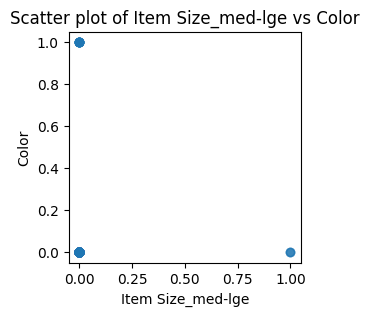

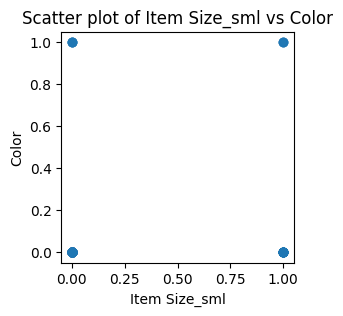

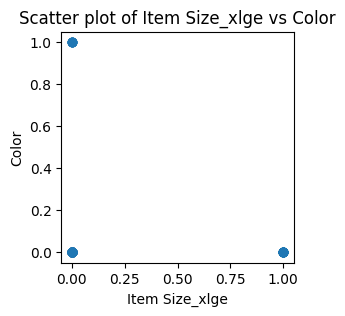

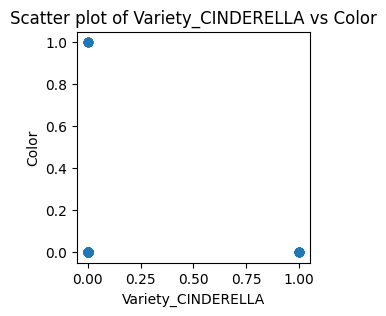

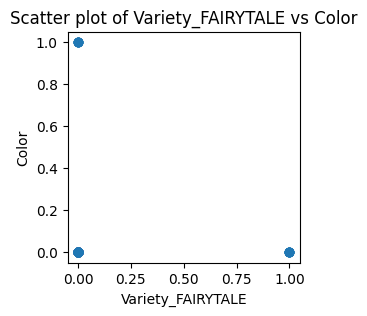

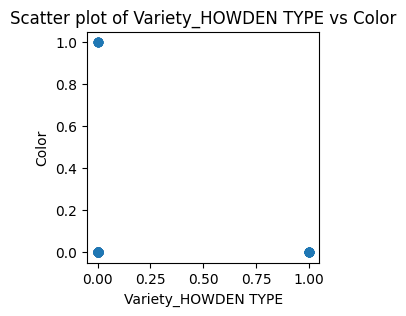

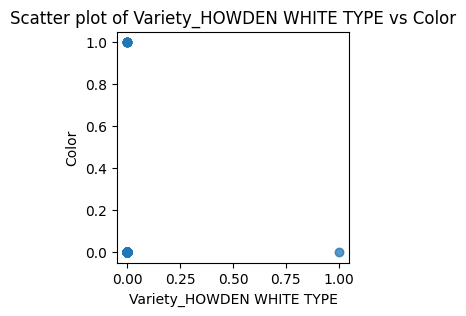

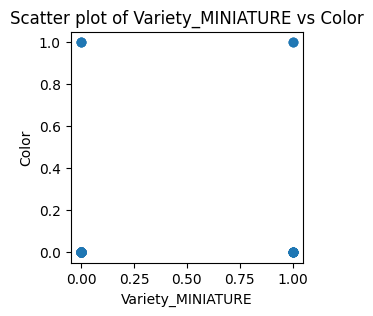

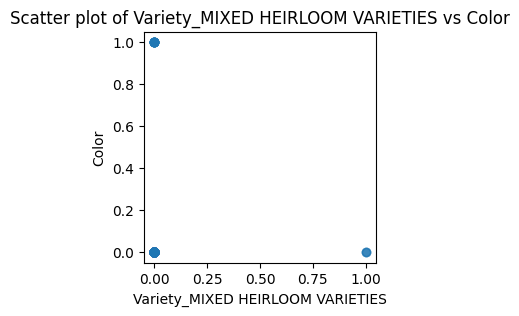

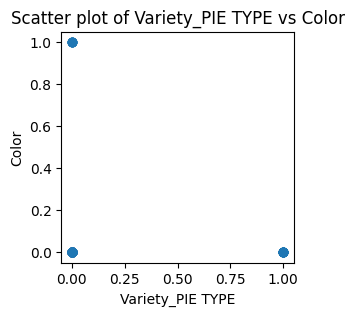

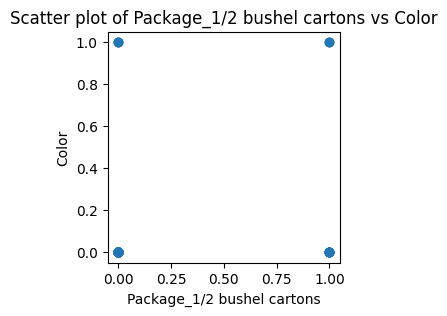

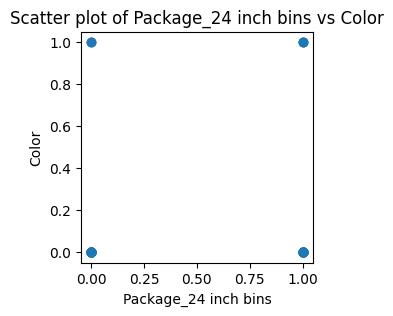

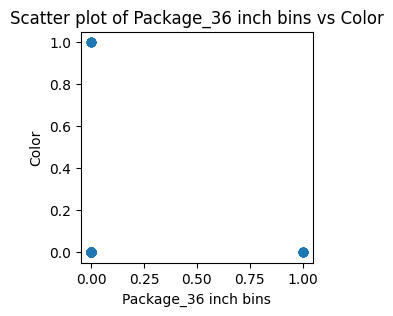

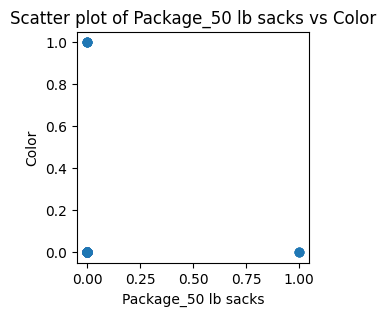

In [64]:
for column in X.columns:
    plt.figure(figsize=(3, 3))
    plt.scatter(X[column], y, alpha=0.5)
    plt.title(f'Scatter plot of {column} vs Color')
    plt.xlabel(column)
    plt.ylabel('Color')
    plt.show()

In [55]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LINEAR REGRESSION

In [56]:
linear_reg_model = LinearRegression()

In [57]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Making predictions on the testing data
y_pred = linear_reg_model.predict(X_test)

In [59]:
# Calculating mean squared error on the testing data
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

In [60]:
print("Mean Squared Error:", mse)

Mean Squared Error: 0.05981923345617019


# LOGISTIC REGRESSION

In [65]:
# Initialize the logistic regression model
logistic_reg_model = LogisticRegression()

In [66]:
# Fit the model to the training data
logistic_reg_model.fit(X_train, y_train)

c:\Users\IBRAHIM UMAR FARUK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [67]:
# Make predictions on the testing data
y_pred = logistic_reg_model.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred))
print('Predicted labels: ', y_pred)
print('Accuracy: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      1.00      0.97        29
        True       0.00      0.00      0.00         2

    accuracy                           0.94        31
   macro avg       0.47      0.50      0.48        31
weighted avg       0.88      0.94      0.90        31

Predicted labels:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False]
Accuracy:  0.9354838709677419


c:\Users\IBRAHIM UMAR FARUK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\IBRAHIM UMAR FARUK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\IBRAHIM UMAR FARUK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [70]:
confusion_matrix(y_test, y_pred)

array([[29,  0],
       [ 2,  0]], dtype=int64)

In [75]:
from sklearn.metrics import roc_auc_score

y_scores = logistic_reg_model.predict_proba(X_test)

auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.9051724137931034
